In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df = pd.read_csv('./0.dataset/empAll.csv')
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
0,7369,SMITH,CLERK,7902.0,12-17-1980,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,2-20-1981,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,2-22-1981,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,4-2-1981,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,9-28-1981,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,5-1-1981,2850,NaN,30
6,7839,KING,PRESIDENT,NaN,11-17-1981,5000,NaN,10
7,7844,TURNER,SALESMAN,7698.0,9-8-1981,1500,0.0,30
8,7900,JAMES,CLERK,7698.0,12-3-1981,950,NaN,30
9,7902,FORD,ANALYST,7566.0,12-3-1981,3000,NaN,20


부서번호별 직원 수
------------------------------------------------------------------------------------------------------------------------
DEPTNO
10    2
20    3
30    6
dtype: int64
부서번호별 index
------------------------------------------------------------------------------------------------------------------------
{10: [6, 10], 20: [0, 3, 9], 30: [1, 2, 4, 5, 7, 8]}
부서별 SAL합계 및 평균SAL
------------------------------------------------------------------------------------------------------------------------
         sum         mean
         SAL          SAL
DEPTNO                   
10      6300  3150.000000
20      6775  2258.333333
30      9400  1566.666667
부서별 SAL합계 및 평균SAL 시각화


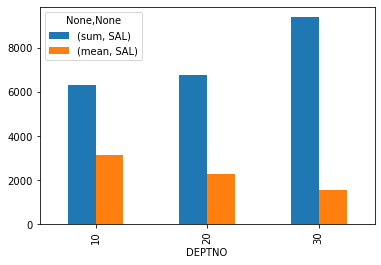

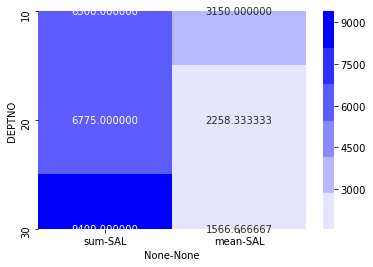

In [248]:
groupby_dept = df.groupby('DEPTNO')

print("부서번호별 직원 수")
print('---'*40)
print(groupby_dept.size())
print('==='*40)

print("부서번호별 index")
print('---'*40)
print(groupby_dept.groups)
print('==='*40)

print('부서별 SAL합계 및 평균SAL')
print('---'*40)
table = df.pivot_table(values="SAL", index=['DEPTNO'],aggfunc=['sum','mean'])
print(table)
print('==='*40)

print('부서별 SAL합계 및 평균SAL 시각화')
table.plot.bar()
plt.show()


sns.heatmap(table, annot=True, fmt='f', cmap=sns.light_palette('blue'))

직업별 직원 수
------------------------------------------------------------------------------------------------------------------------
JOB
ANALYST      1
CLERK        3
MANAGER      2
PRESIDENT    1
SALESMAN     4
dtype: int64
직업별 index
------------------------------------------------------------------------------------------------------------------------
{'ANALYST': [9], 'CLERK': [0, 8, 10], 'MANAGER': [3, 5], 'PRESIDENT': [6], 'SALESMAN': [1, 2, 4, 7]}
------------------------------------------------------------------------------------------------------------------------
직업별 SAL합계 및 평균SAL
------------------------------------------------------------------------------------------------------------------------
            sum         mean
            SAL          SAL
JOB                         
ANALYST    3000  3000.000000
CLERK      3050  1016.666667
MANAGER    5825  2912.500000
PRESIDENT  5000  5000.000000
SALESMAN   5600  1400.000000
 직업별 SAL합계 및 평균SAL 시각화


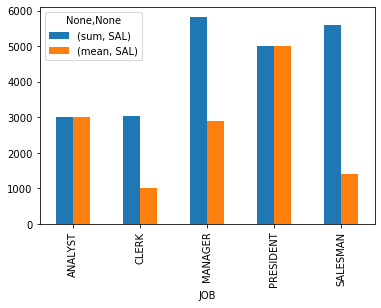

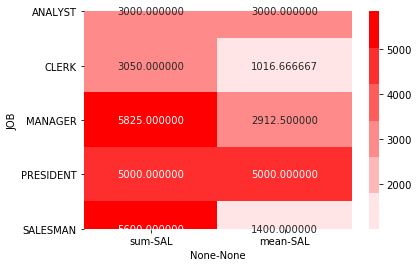

In [246]:
groupby_job = df.groupby('JOB')

print("직업별 직원 수")
print('---'*40)
print(groupby_job.size())
print('==='*40)
print("직업별 index")
print('---'*40)
print(groupby_job.groups)
print('---'*40)

print('직업별 SAL합계 및 평균SAL')
print('---'*40)
table2 = df.pivot_table(values="SAL", index=['JOB'],aggfunc=['sum','mean'])
print(table2)
print('==='*40)

print(' 직업별 SAL합계 및 평균SAL 시각화')
table2.plot.bar()
plt.show()

sns.heatmap(table2, annot=True, fmt='f', cmap=sns.light_palette('red'))

In [47]:
print('직업별 직원 index 및 이름')
print('---'*30)
for key, value in groupby_job:
    print(key,'-',value.ENAME)
    print('==='*30)

직업별 직원 index 및 이름
------------------------------------------------------------------------------------------
ANALYST - 9    FORD
Name: ENAME, dtype: object
CLERK - 0      SMITH
8      JAMES
10    MILLER
Name: ENAME, dtype: object
MANAGER - 3    JONES
5    BLAKE
Name: ENAME, dtype: object
PRESIDENT - 6    KING
Name: ENAME, dtype: object
SALESMAN - 1     ALLEN
2      WARD
4    MARTIN
7    TURNER
Name: ENAME, dtype: object


In [42]:
print('직원이름을 입력받았을 때 그 직원의 매니저 이름 구하기')
print('==='*30)
inputname = input("직원이름입력:")
mgrno = ''

for key,value in df.iterrows():
    if value.ENAME==inputname:
        mgrno=value.MGR

for key,value in df.iterrows():
    if value.EMPNO==mgrno:
        print('mgr이름:',value.ENAME)

직원이름을 입력받았을 때 그 직원의 매니저 이름 구하기


직원이름입력: SMITH


mgr이름: FORD


In [186]:
groupby_mgr = df.groupby('MGR')

print('매니저의 empno 별 하부 직원 이름 출력')
print('---'*30)
for key, value in groupby_mgr:
    print(key,value.ENAME)
    print("==="*30)

매니저의 empno 별 하부 직원 이름 출력
------------------------------------------------------------------------------------------
7566.0 9    FORD
Name: ENAME, dtype: object
7698.0 1     ALLEN
2      WARD
4    MARTIN
7    TURNER
8     JAMES
Name: ENAME, dtype: object
7782.0 10    MILLER
Name: ENAME, dtype: object
7839.0 3    JONES
5    BLAKE
Name: ENAME, dtype: object
7902.0 0    SMITH
Name: ENAME, dtype: object


In [190]:
def getENAME(mgr,emp):    # emp 테이블에서 mgr번호가 주어졌을때 mgr의 이름을 반환하는 함수
    for key,value in emp.iterrows():
        if mgr==value.EMPNO:
            return value.ENAME

In [191]:
print('매니저 이름별 하부 직원 이름 출력')
print('---'*30)
        
df['MGRNAME'] = df['MGR'].apply(getENAME, emp=df)
df

매니저 이름별 하부 직원 이름 출력
------------------------------------------------------------------------------------------


,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO,MGRNAME
0,7369,SMITH,CLERK,7902.0,12-17-1980,800,NaN,20,FORD
1,7499,ALLEN,SALESMAN,7698.0,2-20-1981,1600,300.0,30,BLAKE
2,7521,WARD,SALESMAN,7698.0,2-22-1981,1250,500.0,30,BLAKE
3,7566,JONES,MANAGER,7839.0,4-2-1981,2975,NaN,20,KING
4,7654,MARTIN,SALESMAN,7698.0,9-28-1981,1250,1400.0,30,BLAKE
5,7698,BLAKE,MANAGER,7839.0,5-1-1981,2850,NaN,30,KING
6,7839,KING,PRESIDENT,NaN,11-17-1981,5000,NaN,10,None
7,7844,TURNER,SALESMAN,7698.0,9-8-1981,1500,0.0,30,BLAKE
8,7900,JAMES,CLERK,7698.0,12-3-1981,950,NaN,30,BLAKE
9,7902,FORD,ANALYST,7566.0,12-3-1981,3000,NaN,20,JONES
